<h1>Импорт библиотек

In [20]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [19]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = 0
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

def test_sum_prod():
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [2]]), np.array([[5], [6]])]
    assert np.array_equal(sum_prod(X, V), np.array([[66], [94]]))

test_sum_prod()
    

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [27]:
def binarize(M, threshold=0.5):
    M[(M > threshold)] = 1
    M[(M <= threshold)] = 0
    return M

def test_binarize():
    M = np.array([[1, 2], [3, 4]])
    assert np.array_equal(binarize(M), np.array([[1, 1], [1, 1]]))

    M = np.array([[0, 0.5], [3, 0.4]])
    assert np.array_equal(binarize(M), np.array([[0, 0], [1, 0]]))

test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [12]:
def unique_rows(mat):
    x = mat.shape[0]
    answer_list = []
    for i in range(x):
        list_unique, counts = np.unique(mat[i, :], return_counts=True)
        d = dict(zip(list_unique, counts))
        b = []
        for key in d.keys():
            if d[key] == 1:
                b.append(key)
        answer_list.append(b)
    count = 1
    text = ""
    for i in range(len(answer_list)):
        if i != len(answer_list) - 1:
            line = ', '.join(map(str, answer_list[i]))
            text += f"{count}-я строка: {line}. "
        else:
            line = ', '.join(map(str, answer_list[i]))
            text += f"{count}-я строка: {line}."
        count += 1
    return text

def unique_columns(mat):
    mat = np.transpose(mat)
    x = mat.shape[0]
    answer_list = []
    for i in range(x):
        list_unique, counts = np.unique(mat[i, :], return_counts=True)
        d = dict(zip(list_unique, counts))
        b = []
        for key in d.keys():
            if d[key] == 1:
                b.append(key)
        answer_list.append(b)
    count = 1
    text = ""
    for i in range(len(answer_list)):
        if i != len(answer_list) - 1:
            line = ', '.join(map(str, answer_list[i]))
            text += f"{count}-й столбец: {line}. "
        else:
            line = ', '.join(map(str, answer_list[i]))
            text += f"{count}-й столбец: {line}."
        count += 1
    return text


def test_unique_rows():
    A = np.array([[1, 2, 1, 4],
                  [5, 5, 7, 8],
                  [9, 10, 10, 12]])
    assert unique_rows(A) == '1-я строка: 2, 4. 2-я строка: 7, 8. 3-я строка: 9, 12.'
test_unique_rows()

def test_unique_columns():
    A = np.array([[10, 7, 7, 4],
                  [5, 5, 7, 8],
                  [5, 7, 10, 12]])
    assert unique_columns(A) == '1-й столбец: 10. 2-й столбец: 5. 3-й столбец: 10. 4-й столбец: 4, 8, 12.'
test_unique_columns()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [21]:
def func(m, n):
    matrix = np.random.normal(size=(m, n))
    for i in range(m): #столбцы
        mean = np.mean(matrix[i, :]) #мат ожидание
        var = np.var(matrix[i, :]) #дисперсия
        plt.hist(matrix[i, :])
        plt.title(f'Histogram for row {i+1}')
        plt.show()
    transposed_matrix = np.transpose(matrix)
    for i in range(n): #столбцы
        mean = np.mean(transposed_matrix[i, :]) #мат ожидание
        var = np.var(transposed_matrix[i, :]) #дисперсия
        plt.hist(transposed_matrix[i, :])
        plt.title(f'Histogram for column {i+1}')
        plt.show()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [25]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

def test_chess():
    m, n, a, b = 4, 3, 7, 8
    assert np.array_equal(chess(m, n, a, b), np.array([[7, 8, 7], [8, 7, 8], [7, 8, 7], [8, 7, 8]]))

test_chess()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

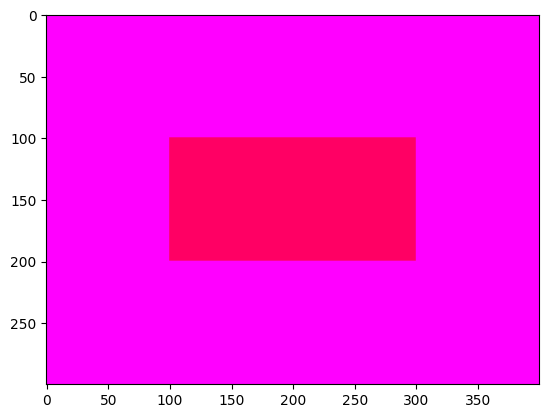

In [41]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # a, m - строки
    # b, n - столбцы
    image = np.full((m, n, 3), background_color) #цифра 3 указывает на количество цветовых каналов
    row_start = (m - a) // 2
    row_end = row_start + a
    col_start = (n - b) // 2
    col_end = col_start + b
    image[row_start:row_end, col_start:col_end, :] = rectangle_color
    plt.imshow(image)
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Your code goes here
    pass

draw_rectangle(100, 200, 300, 400, (255, 0, 100), (255, 0, 255))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [ ]:
# Your code goes here

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [ ]:
# Your code goes here